# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []
units = "metric"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    city_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | sabha
Processing Record 4 of Set 1 | melekeok village
Processing Record 5 of Set 1 | margaret river
Processing Record 6 of Set 1 | port lincoln
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | rzhaksa
Processing Record 10 of Set 1 | yellowknife
Processing Record 11 of Set 1 | nerchinsk
Processing Record 12 of Set 1 | keflavik
Processing Record 13 of Set 1 | east london
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | ahtari
Processing Record 17 of Set 1 | olonkinbyen
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | saksaul'skiy
City not found. Skipping...
Processing Record 21 of Set 1 | college
P

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,21.72,95,0,1.03,ZA,1707079878
1,adamstown,-25.0660,-130.1015,24.99,79,98,4.50,PN,1707079878
2,sabha,27.0377,14.4283,12.95,44,75,3.49,LY,1707079878
3,melekeok village,7.4957,134.6367,27.31,83,75,3.60,PW,1707079878
4,margaret river,-33.9500,115.0667,13.05,78,59,2.93,AU,1707079879


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,21.72,95,0,1.03,ZA,1707079878
1,adamstown,-25.0660,-130.1015,24.99,79,98,4.50,PN,1707079878
2,sabha,27.0377,14.4283,12.95,44,75,3.49,LY,1707079878
3,melekeok village,7.4957,134.6367,27.31,83,75,3.60,PW,1707079878
4,margaret river,-33.9500,115.0667,13.05,78,59,2.93,AU,1707079879


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

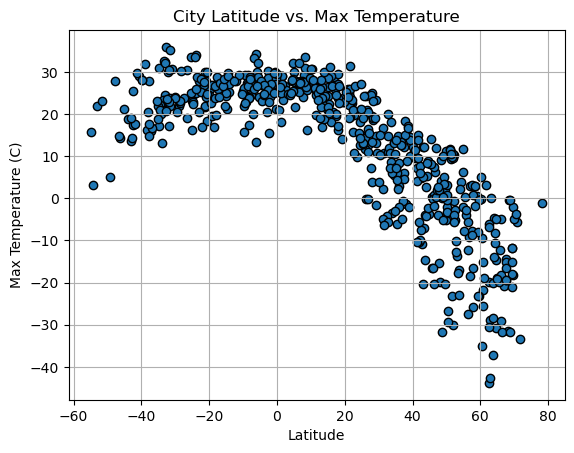

In [25]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid(True)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

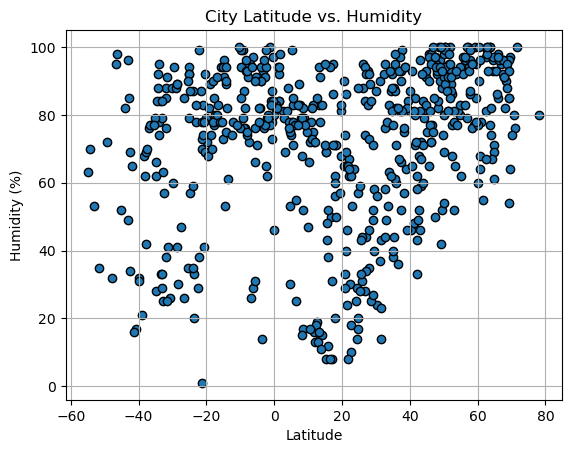

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')


# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

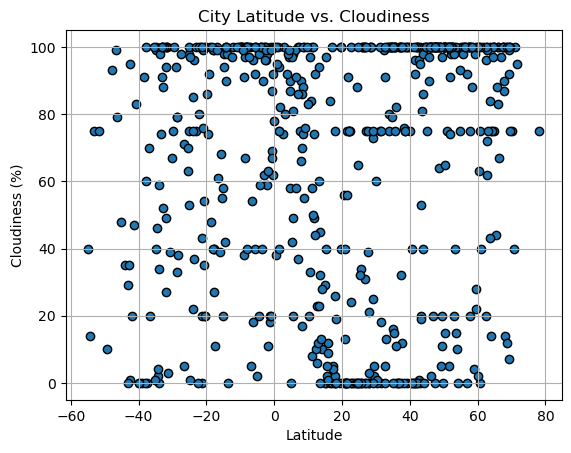

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

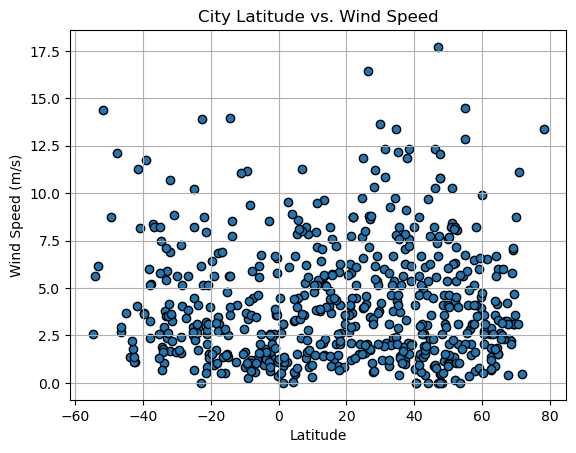

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def plot_linear_regression(df, x_column, y_column, title, xlabel, ylabel):
    # Extract x and y values from the DataFrame
    x = df[x_column]
    y = df[y_column]
    
    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    # Calculate the regression values
    reg_values = x * slope + intercept
    
    # Create the plot
    plt.scatter(x, y)  # Plot the data points
    plt.plot(x, reg_values, color='red')  # Plot the regression line
    
    # Annotate the plot with the linear equation and the r-squared value
    plt.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', color='red')
    
    # Adding title and labels
    print(f'The r-value is: {r_value}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show grid and plot
    plt.show()

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,sabha,27.0377,14.4283,12.95,44,75,3.49,LY,1707079878
3,melekeok village,7.4957,134.6367,27.31,83,75,3.60,PW,1707079878
6,lompoc,34.6391,-120.4579,13.40,92,100,13.38,US,1707079879
8,rzhaksa,52.1338,42.0264,-0.59,93,100,6.34,RU,1707079879
9,yellowknife,62.4560,-114.3525,-19.84,81,20,2.57,CA,1707079879


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,21.72,95,0,1.03,ZA,1707079878
1,adamstown,-25.0660,-130.1015,24.99,79,98,4.50,PN,1707079878
4,margaret river,-33.9500,115.0667,13.05,78,59,2.93,AU,1707079879
5,port lincoln,-34.7333,135.8667,17.25,62,99,7.46,AU,1707079879
7,port-aux-francais,-49.3500,70.2167,5.14,72,10,8.73,TF,1707079879


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8501725865855557


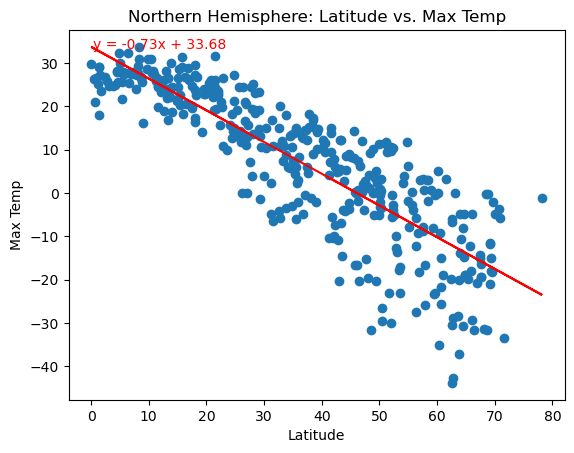

In [48]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Max Temp', "Northern Hemisphere: Latitude vs. Max Temp", "Latitude", "Max Temp")

The r-value is: 0.37304010948344574


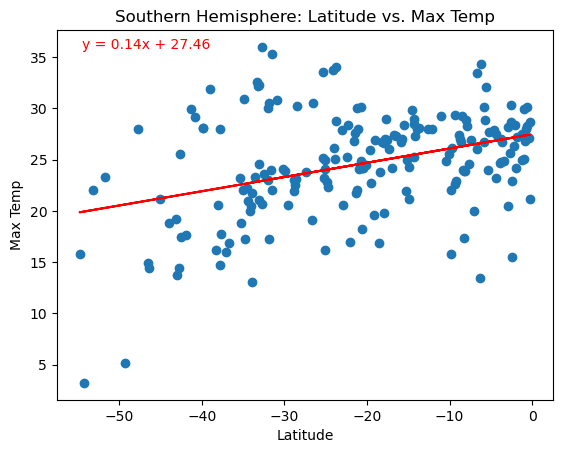

In [49]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Max Temp', "Southern Hemisphere: Latitude vs. Max Temp", "Latitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3984900262780431


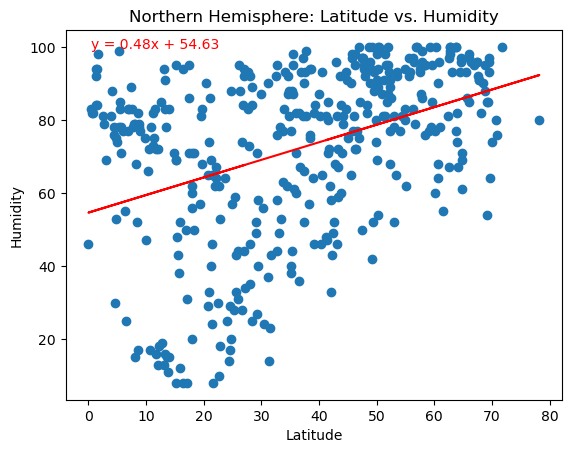

In [50]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Humidity', "Northern Hemisphere: Latitude vs. Humidity", "Latitude", "Humidity")

The r-value is: 0.3556662345942868


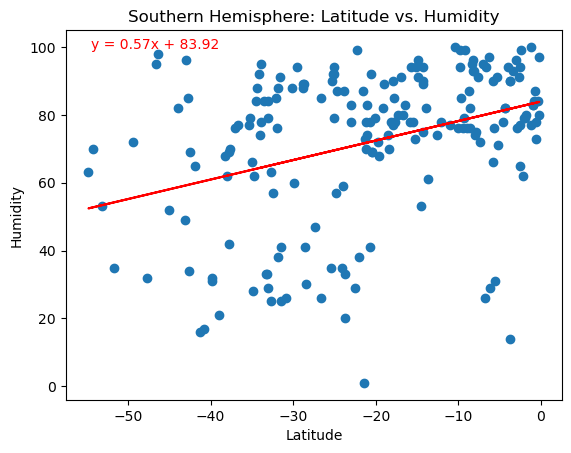

In [51]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Humidity', "Southern Hemisphere: Latitude vs. Humidity", "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.23364355744938223


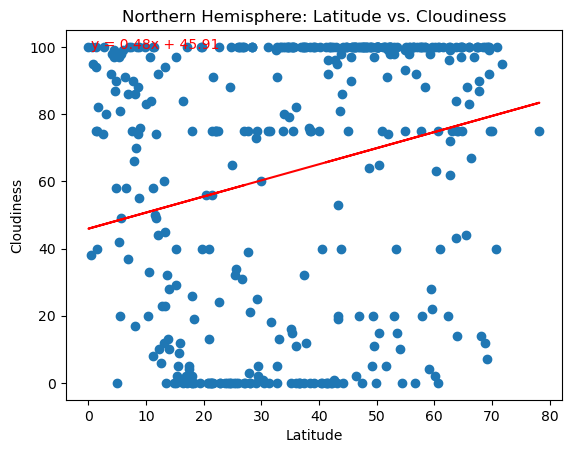

In [52]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Cloudiness', "Northern Hemisphere: Latitude vs. Cloudiness", "Latitude", "Cloudiness")

The r-value is: 0.2677713006803542


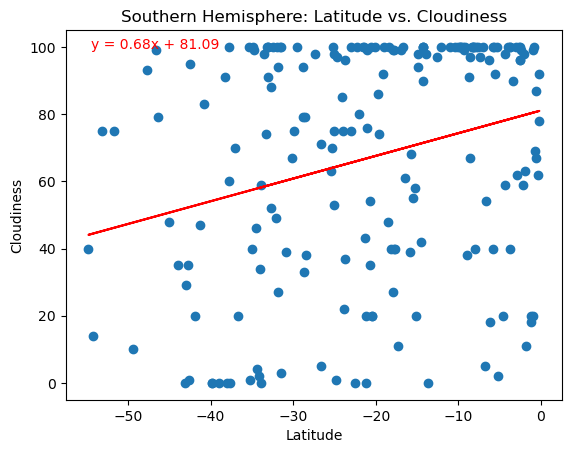

In [53]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Cloudiness', "Southern Hemisphere: Latitude vs. Cloudiness", "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.01822603451416067


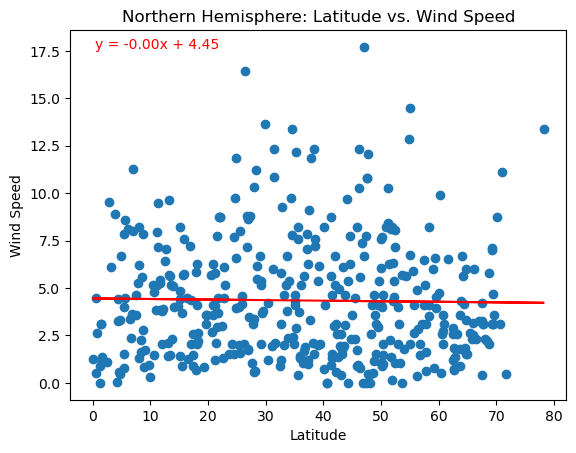

In [54]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df, 'Lat', 'Wind Speed', "Northern Hemisphere: Latitude vs. Wind Speed", "Latitude", "Wind Speed")

The r-value is: -0.24744828367007002


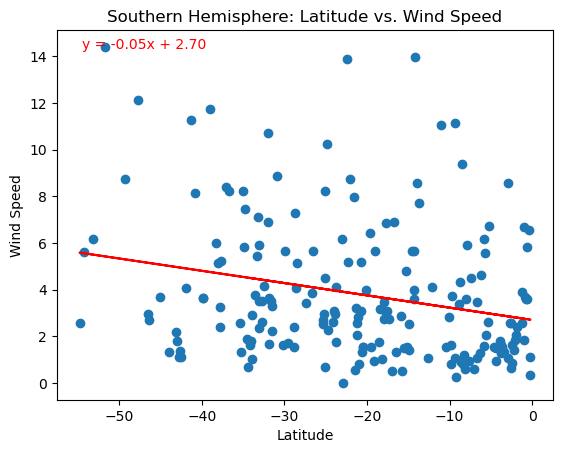

In [55]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df, 'Lat', 'Wind Speed', "Southern Hemisphere: Latitude vs. Wind Speed", "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE